# Ted Jacquet 
Final DS Capstone Project \
Github: https://gitlab.com/ted.jacquet/ds-capstone/ \
Portfolio Website: https://portfolios.cs.earlham.edu/index.php/students/2023-2/ds488/ted-jacquet/ \
Poster: https://drive.google.com/file/d/11w4_OJKDYYkw3lDbBZ6omByP89sKtgpk/view?usp=share_link \
Video: https://youtu.be/PqMgLpNL0gU

In [29]:
#!pip install yfinance

# Dowloading the S&P 500 Stocks historic prices

In [62]:
# import modules
import csv
import pandas as pd
from datetime import datetime
#from yahoofinancials import YahooFinancials
import yfinance as yf
import matplotlib.pyplot as plt


symb = open("symbol_list.txt", "r")
list_symb = symb.readlines()
symb_list = [i.strip() for i in list_symb]
symb.close()
#print(symb_list)
#print(symb)



# initialize parameters
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 12, 15)

#for i in range(1):
for i in range(len(symb_list)):
    # open the file in the write mode
    #file_name = 'stock_data/'+"META"+'_data.csv'
    file_name = "stock_data/"+symb_list[i]+'_data.csv'
    f = open(file_name, 'w')

    #data = yf.download("META", start = start_date, end = end_date)
    data = yf.download(symb_list[i], start = start_date, end = end_date)
    df = pd.DataFrame(data)
    df.to_csv(file_name)
    #print(data)
    #print(df.head())

    print("done") 

[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%***********************]  1 of 1 completed
done
[*********************100%************

In [124]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from pandas import Timestamp
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from pandas import Timestamp
from sklearn.metrics import mean_squared_error, mean_absolute_error

def stock_closing_price_prediction(stock_symbol):
    data_path = "stock_data/"+str(stock_symbol.upper())+"_data.csv"
    df=pd.read_csv(data_path)
    
    
    df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
    df.index=df['Date']

    plt.figure(figsize=(16,8))
    plt.plot(df["Close"])
    plt.title("Close Price history")
    plt.xlabel("Time")
    plt.ylabel("Price")
    #plt.ioff()
    
    print("Actual prices - Plot before prediction")
    plt.show()
    #print(df.head())
    
    file=df.sort_index(ascending=True,axis=0)
    new_frame=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

    for i in range(0,len(file)):
        new_frame["Date"][i]=(file['Date'][i])
        new_frame["Close"][i]=file["Close"][i]

    data_scaler=MinMaxScaler(feature_range=(0,1))
    final_dataframe=new_frame.values

    #print(final_dataframe)

    train_values=final_dataframe[0:987,:]
    final_values=final_dataframe[987:,:]

    #print(final_values)
    new_frame.index=new_frame.Date
    new_frame.drop("Date",axis=1,inplace=True)

    data_scaler=MinMaxScaler(feature_range=(0,1))
    #a = Timestamp("2017-01-03")
    #print(a)
    
    #scaled_values=scaler.fit_transform(final_dataframe)
    scaled_values=data_scaler.fit_transform(new_frame)
    #print(scaled_values)
    x_train_values,y_train_values=[],[]

    for i in range(60,len(train_values)):
        x_train_values.append(scaled_values[i-60:i,0])
        y_train_values.append(scaled_values[i,0])

    x_train_values,y_train_values=np.array(x_train_values),np.array(y_train_values)

    x_train_values=np.reshape(x_train_values,(x_train_values.shape[0],x_train_values.shape[1],1))
    
    
    X_test=[]
    for i in range(60,inputs_values.shape[0]):
        X_test.append(inputs_values[i-60:i,0])
    X_test=np.array(X_test)

    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    closing_price_pediction=training_model.predict(X_test)
    closing_price_pediction=data_scaler.inverse_transform(closing_price_pediction)
    
    
    train_values=new_frame[:987]
    
    final_values=new_frame[987:]
    final_values['Predictions']=closing_price_pediction


    #plt.xlabel(new_dataset["Date"])
    plt.plot(train_values["Close"])
    plt.plot(final_values[['Close',"Predictions"]])
    plt.title("Close Price history")
    #plt.xticks(range(0,len(df.index)), df.index)
    plt.xlabel("Time")
    plt.ylabel("Price")
    
    #Evaluation the model
    print('mean_squared_error : ', mean_squared_error(valid_data['Close'],valid_data["Predictions"] ))
    print('mean_absolute_error : ', mean_absolute_error(valid_data['Close'],valid_data["Predictions"]))
    
stock_closing_price_prediction(stock_symbol)

In [125]:
df=pd.read_csv("stock_data/META_data.csv")
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  116.029999  117.839996  115.510002  116.860001  116.860001   
1  2017-01-04  117.550003  119.660004  117.290001  118.690002  118.690002   
2  2017-01-05  118.860001  120.949997  118.320000  120.669998  120.669998   
3  2017-01-06  120.980003  123.879997  120.029999  123.410004  123.410004   
4  2017-01-09  123.550003  125.430000  123.040001  124.900002  124.900002   

     Volume  
0  20663900  
1  19630900  
2  19492200  
3  28545300  
4  22880400

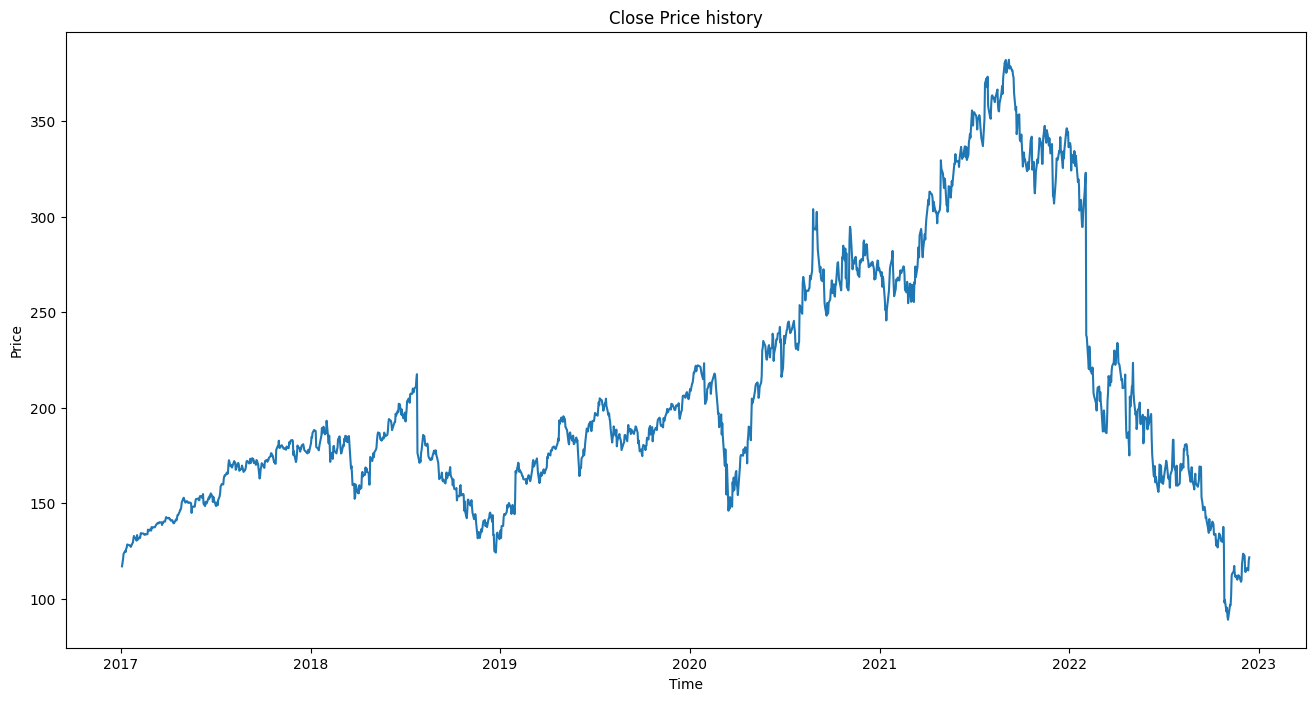

In [126]:

df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"])
plt.title("Close Price history")
plt.xlabel("Time")
plt.ylabel("Price")
#plt.ioff()
plt.show()
#print(df.head())

In [133]:
from pandas import Timestamp

file=df.sort_index(ascending=True,axis=0)
new_frame=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(file)):
    new_frame["Date"][i]=(file['Date'][i])
    new_frame["Close"][i]=file["Close"][i]
#new_dataset["Date"]=pd.to_datetime(new_dataset.Date,format="%Y-%m-%d")
#new_dataset['Date']=new_dataset['Date'].astype(str)


#new_dataset["Date"] = new_dataset["Date"].dt.date
#print(new_dataset)
#new_dataset['Date'] = pd.to_numeric(new_dataset.Date)
#new_dataset['Date'] = pd.to_numeric(new_dataset.Date.str.replace('-',''))


#print(new_dataset)
data_scaler=MinMaxScaler(feature_range=(0,1))
final_dataframe=new_frame.values

print(final_dataframe)
#print(new_dataset)
#print(new_dataset)

train_values=final_dataframe[0:987,:]
final_values=final_dataframe[987:,:]

#print(final_values)
new_frame.index=new_frame.Date
new_frame.drop("Date",axis=1,inplace=True)

data_scaler=MinMaxScaler(feature_range=(0,1))
#a = Timestamp("2017-01-03")
#print(a)

[[Timestamp('2017-01-03 00:00:00') 116.86000061035156]
 [Timestamp('2017-01-04 00:00:00') 118.69000244140624]
 [Timestamp('2017-01-05 00:00:00') 120.66999816894533]
 ...
 [Timestamp('2022-12-12 00:00:00') 114.70999908447266]
 [Timestamp('2022-12-13 00:00:00') 120.1500015258789]
 [Timestamp('2022-12-14 00:00:00') 121.58999633789062]]


In [134]:
#scaled_values=scaler.fit_transform(final_dataframe)
scaled_values=data_scaler.fit_transform(new_frame)
#print(scaled_values)
x_train_values,y_train_values=[],[]

for i in range(60,len(train_values)):
    x_train_values.append(scaled_values[i-60:i,0])
    y_train_values.append(scaled_values[i,0])
    
x_train_values,y_train_values=np.array(x_train_values),np.array(y_train_values)

x_train_values=np.reshape(x_train_values,(x_train_values.shape[0],x_train_values.shape[1],1))

In [135]:
training_model=Sequential()
training_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_values.shape[1],1)))
training_model.add(LSTM(units=50))
training_model.add(Dense(1))

inputs_values=new_frame[len(new_frame)-len(final_values)-60:].values
inputs_values=inputs_values.reshape(-1,1)
inputs_values=data_scaler.transform(inputs_values)

training_model.compile(loss='mean_squared_error',optimizer='adam')
training_model.fit(x_train_values,y_train_values,epochs=1,batch_size=1,verbose=2)

/eccs/home/tojacqu19/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


927/927 - 179s - loss: 0.0021 - 179s/epoch - 193ms/step


In [136]:
X_test=[]
for i in range(60,inputs_values.shape[0]):
    X_test.append(inputs_values[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price_pediction=training_model.predict(X_test)
closing_price_pediction=data_scaler.inverse_transform(closing_price_pediction)

16/16 [==============================] - 2s 90ms/step


In [137]:
training_model.save("saved_model.h5")

<ipython-input-138-3e95ac05d497>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_values['Predictions']=closing_price_pediction


Text(0, 0.5, 'Price')

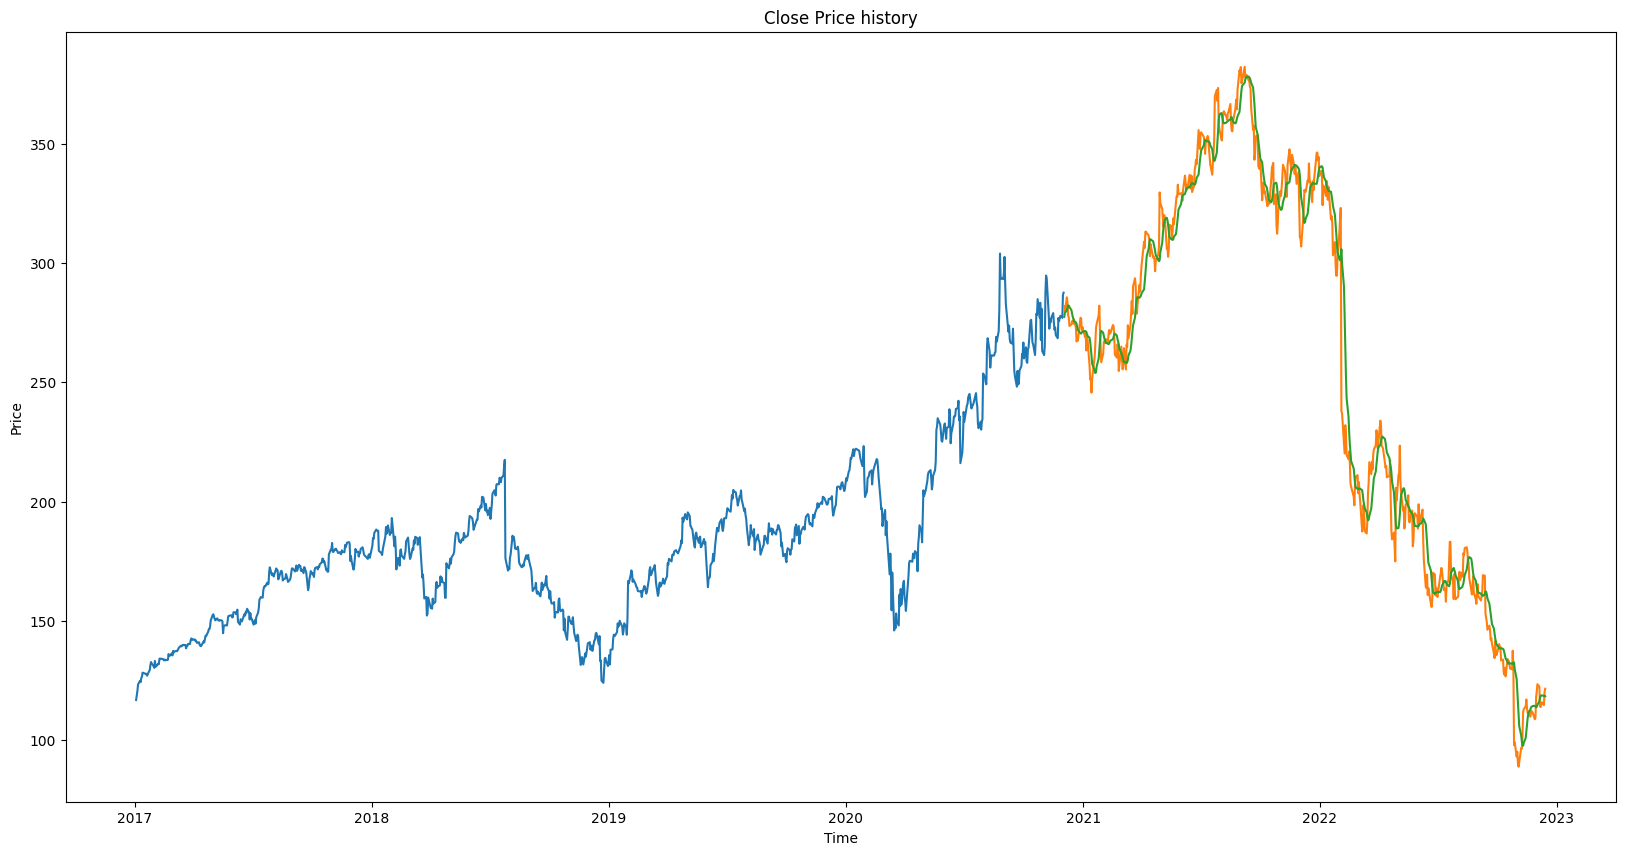

In [138]:
train_values=new_frame[:987]
final_values=new_frame[987:]
final_values['Predictions']=closing_price_pediction


#plt.xlabel(new_dataset["Date"])
plt.plot(train_values["Close"])
plt.plot(final_values[['Close',"Predictions"]])
plt.title("Close Price history")
#plt.xticks(range(0,len(df.index)), df.index)
plt.xlabel("Time")
plt.ylabel("Price")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Evaluation the model
print('mean_squared_error : ', mean_squared_error(valid_data['Close'],valid_data["Predictions"] ))
print('mean_absolute_error : ', mean_absolute_error(valid_data['Close'],valid_data["Predictions"]))

In [ ]:
def closing_price_prediction(stock_ticker_ty)